In [1]:
#Standard utilities
import itertools
import glob
import numpy as np
import pandas as pd

#Preprocessing
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize
from sklearn.cross_validation import train_test_split # Data splitting

#Machine Learinging Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Performance Measures
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

#plotting
import seaborn as sns
import matplotlib as mpl
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
sns.set_context('paper',font_scale=2.0)
#sns.set_style("ticks",)
palette = sns.plt.cm.gray_r
# set masked values to plot red
palette.set_bad('r', 1.0)

/data/olorato/mywork/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_files = shuffle(glob.glob("VV133*pks1613*csv"),random_state=3)
print data_files

['VV1333305511_pks1613-586.1822.ms_all_data_baseline0and3.csv', 'VV1333134985_pks1613-586.1822.ms_all_data_baseline5and6.csv', 'VV1333134985_pks1613-586.1822.ms_all_data_baseline3and6.csv', 'VV1333305511_pks1613-586.1822.ms_all_data_baseline1and2.csv', 'VV1333134985_pks1613-586.1822.ms_all_data_baseline4and6.csv', 'VV1333305511_pks1613-586.1822.ms_all_data_baseline2and3.csv', 'VV1333305511_pks1613-586.1822.ms_all_data_baseline1and4.csv', 'VV1333305511_pks1613-586.1822.ms_all_data_baseline3and4.csv', 'VV1333305511_pks1613-586.1822.ms_all_data_baseline4and6.csv', 'VV1333134985_pks1613-586.1822.ms_all_data_baseline0and4.csv', 'VV1333305511_pks1613-586.1822.ms_all_data_baseline2and6.csv', 'VV1333134985_pks1613-586.1822.ms_all_data_baseline0and6.csv', 'VV1333305511_pks1613-586.1822.ms_all_data_baseline0and4.csv', 'VV1333134985_pks1613-586.1822.ms_all_data_baseline0and5.csv', 'VV1333134985_pks1613-586.1822.ms_all_data_baseline2and5.csv', 'VV1333305511_pks1613-586.1822.ms_all_data_baseline0an

In [3]:
datasets = []
for filename in shuffle(data_files[:],random_state=4):
    data = pd.DataFrame.from_csv(filename)
    if len(np.where(data["rfi"].values == 1)[0])/float(len(data["rfi"])) < 0.4:
        datasets.append(data)
        print filename
    del data
X0 = pd.concat(datasets, ignore_index=True)
del datasets

VV1333305511_pks1613-586.1822.ms_all_data_baseline3and5.csv
VV1333305511_pks1613-586.1822.ms_all_data_baseline0and5.csv
VV1333134985_pks1613-586.1822.ms_all_data_baseline4and6.csv
VV1333305511_pks1613-586.1822.ms_all_data_baseline0and1.csv
VV1333134985_pks1613-586.1822.ms_all_data_baseline4and5.csv
VV1333134985_pks1613-586.1822.ms_all_data_baseline2and3.csv
VV1333134985_pks1613-586.1822.ms_all_data_baseline0and1.csv
VV1333305511_pks1613-586.1822.ms_all_data_baseline3and4.csv
VV1333134985_pks1613-586.1822.ms_all_data_baseline3and5.csv
VV1333134985_pks1613-586.1822.ms_all_data_baseline0and6.csv
VV1333134985_pks1613-586.1822.ms_all_data_baseline2and4.csv
VV1333305511_pks1613-586.1822.ms_all_data_baseline4and5.csv
VV1333305511_pks1613-586.1822.ms_all_data_baseline0and4.csv
VV1333305511_pks1613-586.1822.ms_all_data_baseline0and6.csv
VV1333305511_pks1613-586.1822.ms_all_data_baseline1and6.csv
VV1333134985_pks1613-586.1822.ms_all_data_baseline1and5.csv
VV1333305511_pks1613-586.1822.ms_all_dat

In [4]:
names = ["d_p","tC_mean","tp_mean",'t_skew','t_kurtosis','t_cumsumx','t_sumvalues'
         ,'t_slope','t_per25','t_per75','t_var',"fC_mean","fp_mean",'f_skew'
         ,'f_kurtosis','f_cumsumx','f_sumvalues','f_slope','f_per25','f_per75','f_var']
target_names = ['Not RFI','RFI']

In [5]:
for i in range(10):
    X0= shuffle(X0,random_state=2458)
HH_X0_not = X0[X0["rfi"]==0]
HH_X0_is = X0[X0["rfi"]==1]
X0 = pd.concat([HH_X0_not[:int(len(HH_X0_is)/len(data_files)*4.0)],HH_X0_is[:len(HH_X0_is)/len(data_files)]], ignore_index=True)
del HH_X0_not
del HH_X0_is
X0 = shuffle(X0.drop_duplicates())
print len(X0),len(np.unique(X0["d_p"]))

18525 18519


In [6]:
x_train0, x_test0, y_train0, y_test0 = train_test_split(X0[names]
                                        ,X0['rfi'], test_size=0.30
                                        ,random_state=6)

In [7]:
pairs = list(itertools.combinations(names,2))
len(pairs)

210

In [8]:
pair_num = 140
pairs[pair_num]

('t_per25', 'f_slope')

0 1 2 3

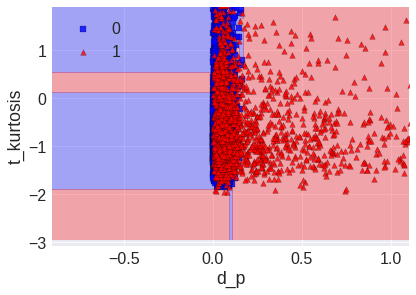

In [9]:
for pair_num in range(4):
    print pair_num,
    if pair_num > 0:
        sns.plt.close()
    rfc = RandomForestClassifier(n_jobs=-1,random_state=8)
    rfc.fit(x_train0[list(pairs[pair_num])].values, y_train0.values)
    sns.plt.figure()
    #sns.plt.subplots_adjust(wspace=.5)
    #sns.plt.subplot(131)
    plot_decision_regions(x_train0[list(pairs[pair_num])].values, y_train0.values, clf=rfc,
                  legend=2,colors="b,r",markers="s^")
    #sns.plt.xlim(0.0,0.2)
    #sns.plt.ylim(-0.2,0.2)
    sns.plt.xlabel(list(pairs[pair_num])[0])
    sns.plt.ylabel(list(pairs[pair_num])[1])
    sns.plt.grid(True)
    sns.plt.xlim(np.mean(x_train0[pairs[pair_num][0]]) - 3.0*np.std(x_train0[pairs[pair_num][0]])
                 ,np.mean(x_train0[pairs[pair_num][0]]) + 3.0*np.std(x_train0[pairs[pair_num][0]]))
    
    sns.plt.ylim(np.mean(x_train0[pairs[pair_num][1]]) - 3.0*np.std(x_train0[pairs[pair_num][1]])
                 ,np.mean(x_train0[pairs[pair_num][1]]) + 3.0*np.std(x_train0[pairs[pair_num][1]]))
    #sns.plt.title('RFC')
    sns.plt.savefig("Results/VV/RFC_D-regions_"+list(pairs[pair_num])[1]+"_vs_"+list(pairs[pair_num])[0]+".png",dpi=600)
sns.plt.show()

0 1 2 3

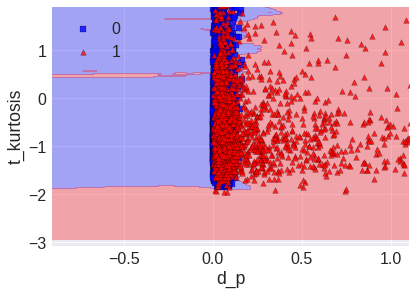

In [10]:
for pair_num in range(4):
    print pair_num,
    if pair_num > 0:
        sns.plt.close()
    sns.plt.figure()
    knn = KNeighborsClassifier(n_jobs=-1)
    knn.fit(x_train0[list(pairs[pair_num])].values, y_train0.values)
    plot_decision_regions(x_train0[list(pairs[pair_num])].values, y_train0.values, clf=knn,
                          legend=2,colors="b,r",markers="s^")
    #sns.plt.xlim(0.0,0.2)
    #sns.plt.ylim(-0.2,0.2)
    sns.plt.xlabel(list(pairs[pair_num])[0])
    sns.plt.ylabel(list(pairs[pair_num])[1])
    sns.plt.grid(True)
    sns.plt.xlim(np.mean(x_train0[pairs[pair_num][0]]) - 3.0*np.std(x_train0[pairs[pair_num][0]])
                 ,np.mean(x_train0[pairs[pair_num][0]]) + 3.0*np.std(x_train0[pairs[pair_num][0]]))
    
    sns.plt.ylim(np.mean(x_train0[pairs[pair_num][1]]) - 3.0*np.std(x_train0[pairs[pair_num][1]])
                 ,np.mean(x_train0[pairs[pair_num][1]]) + 3.0*np.std(x_train0[pairs[pair_num][1]]))
    #sns.plt.title("KNN")
    sns.plt.savefig("Results/VV/KNN_D-regions_"+list(pairs[pair_num])[1]+"_vs_"+list(pairs[pair_num])[0]+".png",dpi=600)
sns.plt.show()

0 1 2 3

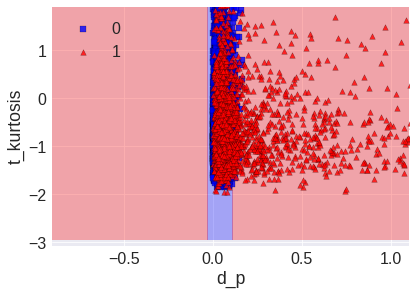

In [11]:
for pair_num in range(4):
    print pair_num,
    if pair_num > 0:
        sns.plt.close()
    sns.plt.figure()
    gnb = GaussianNB()
    gnb.fit(x_train0[list(pairs[pair_num])].values, y_train0.values)
    plot_decision_regions(x_train0[list(pairs[pair_num])].values, y_train0.values, clf=gnb,
                          legend=2,colors="b,r",markers="s^")
    #sns.plt.xlim(0.0,0.2)
    #sns.plt.ylim(-0.2,0.2)
    sns.plt.xlabel(list(pairs[pair_num])[0])
    sns.plt.ylabel(list(pairs[pair_num])[1])
    #sns.plt.title('NB')
    sns.plt.grid(True)
    sns.plt.xlim(np.mean(x_train0[pairs[pair_num][0]]) - 3.0*np.std(x_train0[pairs[pair_num][0]])
                 ,np.mean(x_train0[pairs[pair_num][0]]) + 3.0*np.std(x_train0[pairs[pair_num][0]]))
    
    sns.plt.ylim(np.mean(x_train0[pairs[pair_num][1]]) - 3.0*np.std(x_train0[pairs[pair_num][1]])
                 ,np.mean(x_train0[pairs[pair_num][1]]) + 3.0*np.std(x_train0[pairs[pair_num][1]]))
    sns.plt.savefig("Results/VV/NB_D-regions_"+list(pairs[pair_num])[1]+"_vs_"+list(pairs[pair_num])[0]+".png",dpi=600)

sns.plt.show()
#sns.plt.figure()
#iris_melt = pd.melt(X0[[names[1]]+["rfi"]], "rfi", var_name="measurement")
##f, ax = sns.plt.subplots(1, figsize=(15,9))
#sns.boxplot( hue="rfi",palette=["b","r"], data=iris_melt,x="measurement", y="value")#, jitter=True, edgecolor="white")
#sns.plt.grid(True)
##sns.plt.ylim(-(np.mean(X0[names[1]])+0.1),np.mean(X0[names[1]])+0.1)
#sns.plt.show()

0

/data/olorato/mywork/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


 1 2 3

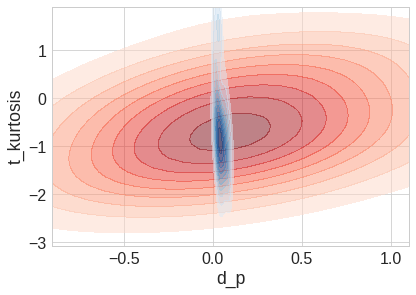

In [12]:
for pair_num in range(4):
    print pair_num,
    if pair_num > 0:
        sns.plt.close()
    sns.plt.figure()
    sns.set_style("whitegrid")
    sns.kdeplot(x_train0[list(pairs[pair_num])[0]][y_train0==1].values[:20]
                ,x_train0[list(pairs[pair_num])[1]][y_train0==1].values[:20]
                ,cmap="Reds",shade=True, shade_lowest=False,alpha=0.5, cbar=True)
    sns.kdeplot(x_train0[list(pairs[pair_num])[0]][y_train0==0].values[:20]
                ,x_train0[list(pairs[pair_num])[1]][y_train0==0].values[:20]
                ,cmap="Blues",shade=True, shade_lowest=False,alpha=0.5, cbar=True)
    sns.plt.ylabel(list(pairs[pair_num])[1])
    sns.plt.xlabel(list(pairs[pair_num])[0])
    sns.plt.legend(loc="best")
    sns.plt.xlim(np.mean(x_train0[pairs[pair_num][0]]) - 3.0*np.std(x_train0[pairs[pair_num][0]])
                 ,np.mean(x_train0[pairs[pair_num][0]]) + 3.0*np.std(x_train0[pairs[pair_num][0]]))
    
    sns.plt.ylim(np.mean(x_train0[pairs[pair_num][1]]) - 3.0*np.std(x_train0[pairs[pair_num][1]])
                 ,np.mean(x_train0[pairs[pair_num][1]]) + 3.0*np.std(x_train0[pairs[pair_num][1]]))
    sns.plt.savefig("Results/VV/Density_"+list(pairs[pair_num])[1]+"_vs_"+list(pairs[pair_num])[0]+".png",dpi=600)
sns.plt.show()

0 1 2

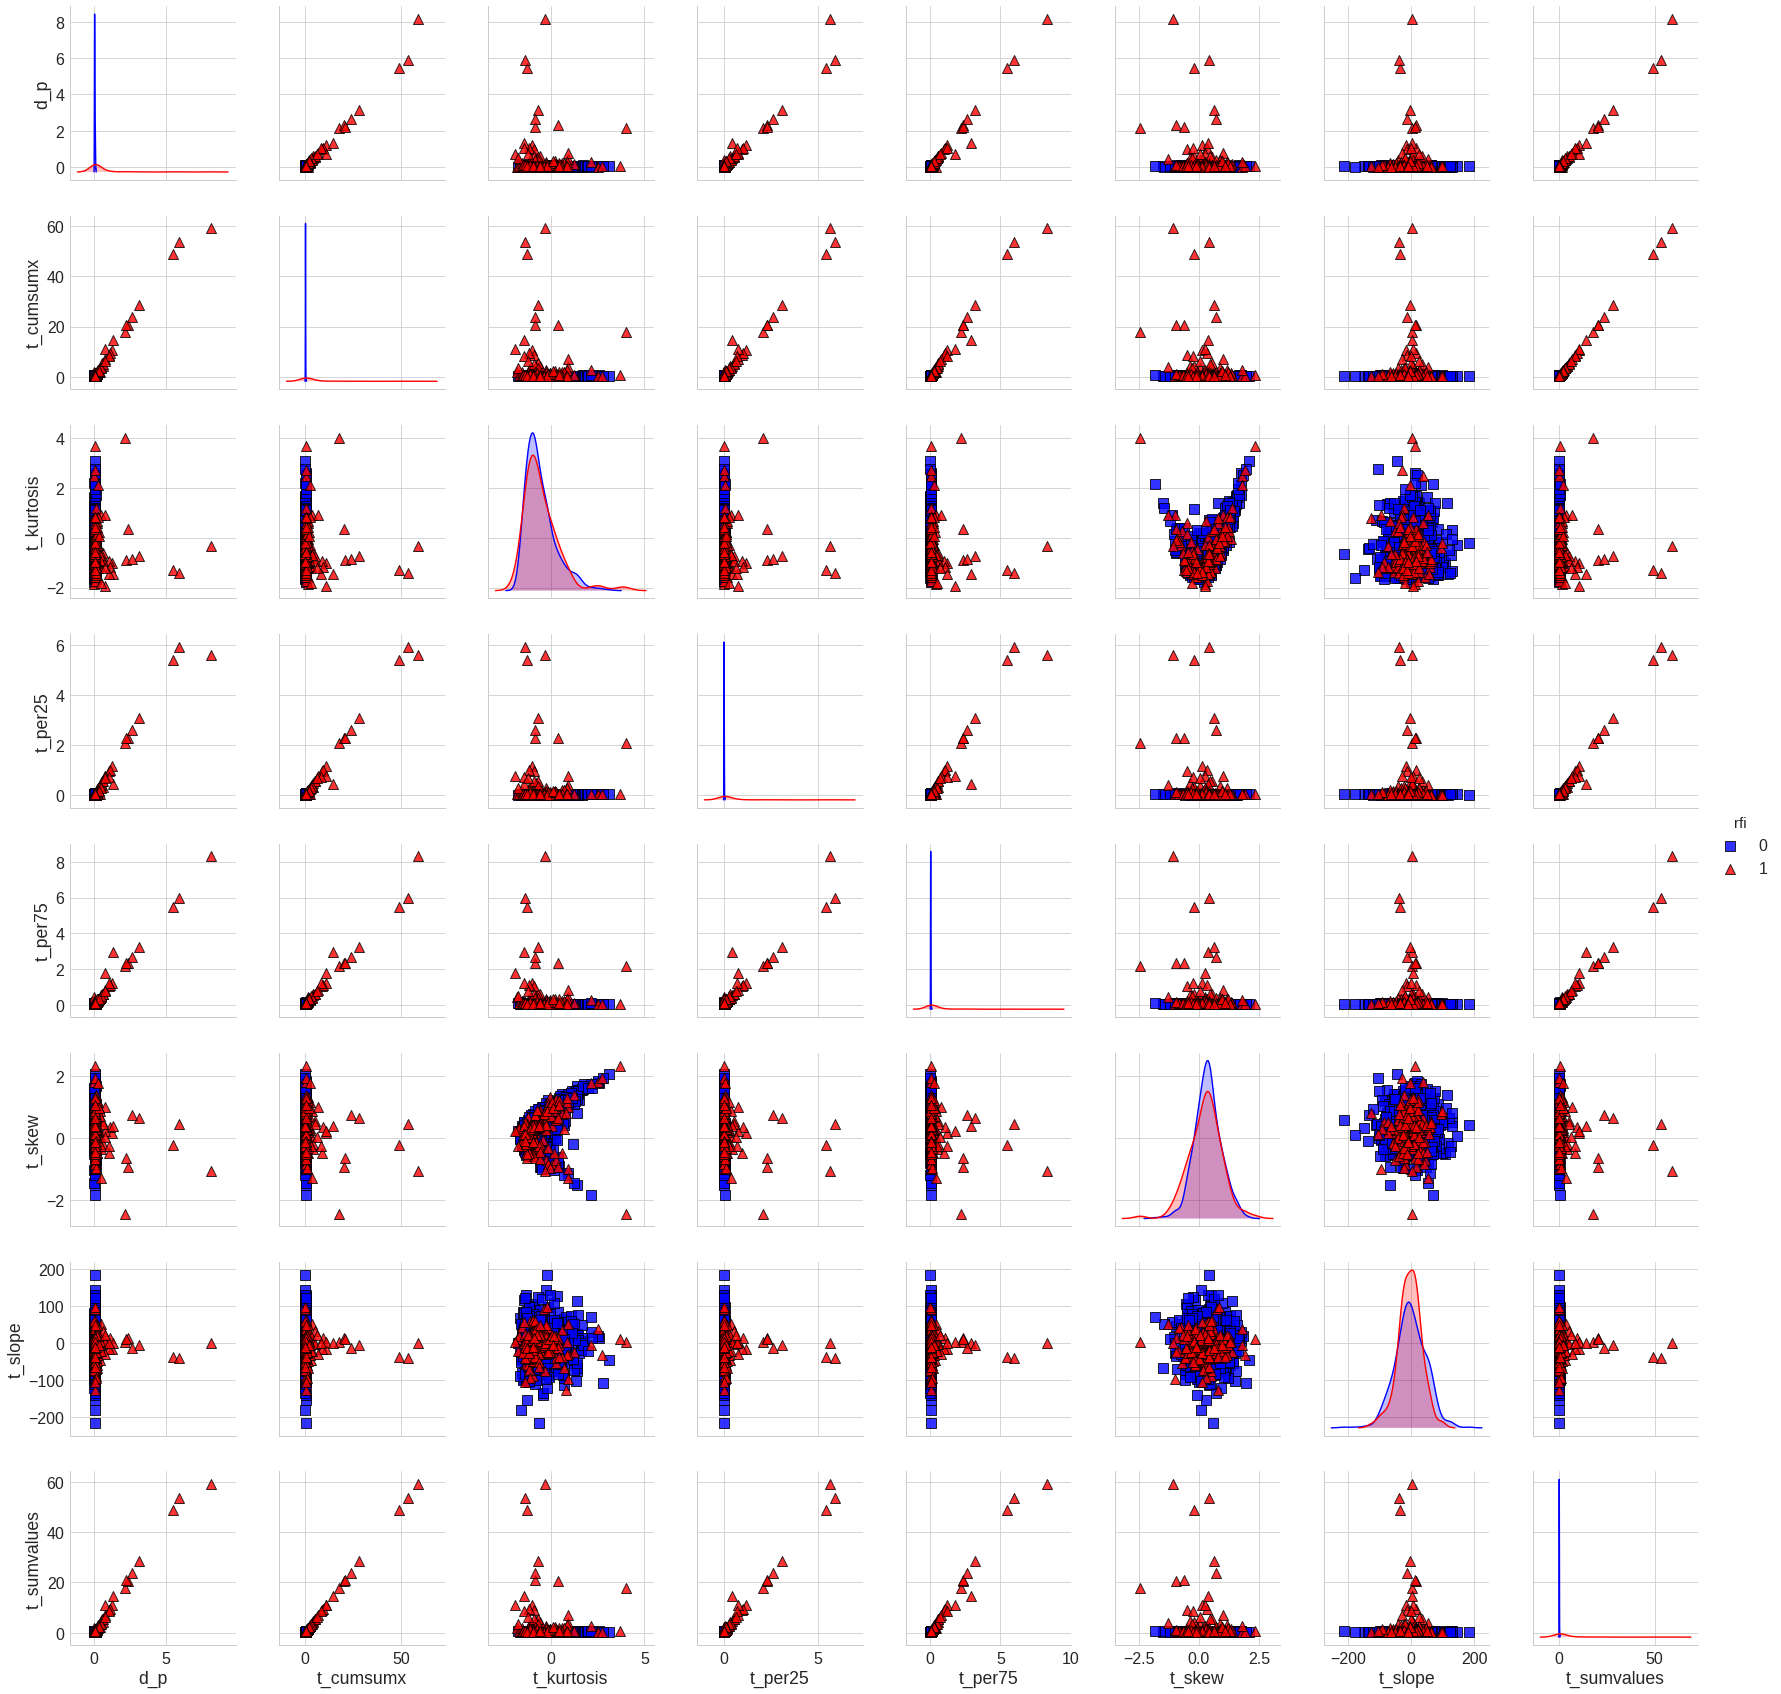

In [13]:
for i in range(3):
    print i,
    if i > 0:
        sns.plt.close()
    sns.plt.figure()
    sns.set_style("whitegrid")
    sns.pairplot(shuffle(X0)[:800], size=3 ,diag_kind="kde",hue="rfi",palette=["b","r"],
                 vars=np.unique(list(itertools.combinations(names,2))[i:i+7]),markers=["s","^"],
                 plot_kws=dict(s=100, edgecolor="k", linewidth=1,alpha=0.8,),
                 diag_kws=dict(shade=True))
    #sns.pairplot(X0[X0.rfi==1][:5], diag_kind="kde",markers='^')
    sns.plt.savefig("Results/VV/Features_"+str(i)+".png",dpi=600)
sns.plt.show()

In [14]:
model_acc_rfc = []
model_acc_gnb = []
model_acc_knn = []
for i in range(100):
    if i % 10 == 0:
        print i,
    X0 = shuffle(X0)
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(X0[names], X0['rfi'], train_size=0.7)
    
    decision_tree_classifier = RandomForestClassifier(n_jobs=-1,random_state=4)
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acc_rfc.append(classifier_accuracy)
    
    decision_tree_classifier = GaussianNB()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acc_gnb.append(classifier_accuracy)
    
    decision_tree_classifier = KNeighborsClassifier(n_jobs=-1)
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acc_knn.append(classifier_accuracy)

del training_inputs
del testing_inputs
del training_classes
del testing_classes
del classifier_accuracy
del decision_tree_classifier

0 10 20 30 40 50 60 70 80 90


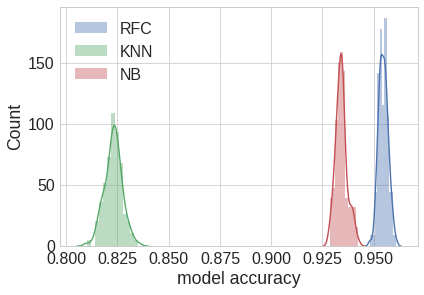

RFC: Mean 0.954697732997	std 0.00225200160929
KNN: Mean 0.823010075567	std 0.00425757442019
NB:  Mean 0.93422634041	std 0.00278223647491


In [15]:
sns.distplot(model_acc_rfc,label="RFC")
sns.distplot(model_acc_knn,label="KNN")
sns.distplot(model_acc_gnb, label="NB")
sns.plt.ylabel("Count")
sns.plt.xlabel("model accuracy")
sns.plt.legend(loc="best")
sns.plt.savefig("Results/VV/VV-average.png",dpi=600)
sns.plt.grid(True)
sns.plt.show()
with open("Results/VV/HH-average.txt","w") as f:
    f.write("RFC: Mean {0}\tstd {1} \n".format(np.mean(model_acc_rfc),np.std(model_acc_rfc)))
    f.write("KNN: Mean {0}\tstd {1} \n".format(np.mean(model_acc_knn),np.std(model_acc_knn)))
    f.write("NB:  Mean {0}\tstd {1} \n".format(np.mean(model_acc_gnb),np.std(model_acc_gnb)))
print "RFC: Mean {0}\tstd {1}".format(np.mean(model_acc_rfc),np.std(model_acc_rfc))
print "KNN: Mean {0}\tstd {1}".format(np.mean(model_acc_knn),np.std(model_acc_knn))
print "NB:  Mean {0}\tstd {1}".format(np.mean(model_acc_gnb),np.std(model_acc_gnb))



In [16]:
cv = StratifiedKFold(y=y_train0,shuffle=True,n_folds=6,random_state=0)

gnb = GaussianNB()
#grid = {"prior": np.resize([None],4)}
#gnb = RandomizedSearchCV(gnb, grid,cv=cv, n_jobs=-1)

rfc = RandomForestClassifier(n_jobs=-1,random_state=4)
grid = {'n_estimators': np.arange(1, 30)
        ,'criterion': ['gini', 'entropy']
        ,'max_features':['sqrt','log2']
        ,'max_depth':np.arange(1,30)
        ,'min_samples_split':np.arange(1,30)}
rfc = RandomizedSearchCV(rfc, grid, cv=cv,n_iter=30,random_state=10004)

knn = KNeighborsClassifier()
grid = {"n_neighbors": np.arange(1, 30, 2)
        ,"metric": ["euclidean", "minkowski"]}
knn = RandomizedSearchCV(knn, grid, cv=cv,n_iter=30)

In [17]:
gnb.fit(x_train0,y_train0)

GaussianNB(priors=None)

In [18]:
rfc.fit(x_train0,y_train0)

RandomizedSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[0 0 ..., 0 0], n_folds=6, shuffle=True, random_state=0),
          error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=4, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=30, n_jobs=1,
          param_distributions={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), 'max_features': ['sqrt', 'log2'], 'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
 ... 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17

In [19]:
knn.fit(x_train0,y_train0)

RandomizedSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[0 0 ..., 0 0], n_folds=6, shuffle=True, random_state=0),
          error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid=True, n_iter=30, n_jobs=1,
          param_distributions={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]), 'metric': ['euclidean', 'minkowski']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [20]:
y_pred_prob_gnb = gnb.predict_proba(x_test0)
y_pred_prob_rfc = rfc.predict_proba(x_test0)
y_pred_prob_knn = knn.predict_proba(x_test0)
y_pred_gnb = gnb.predict(x_test0)
y_pred_rfc = rfc.predict(x_test0)
y_pred_knn = knn.predict(x_test0)

In [21]:
def report(results,num, n_top=3):
    #n_top = len(results['rank_test_score']) -1
    f = open("Results/VV/HV_"+num+"_CV","w")
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            f.write("Model with rank: {0} \n".format(i))
            f.write("Mean validation score: {0:.3f} (std: {1:.3f}) \n".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            f.write("Parameters: {0} \n".format(results['params'][candidate]))
            f.write("--- \n")
    f.close()
    print("Model with rank: {0}".format(i))
    print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
          results['mean_test_score'][candidate],
          results['std_test_score'][candidate]))
    print("Parameters: {0}".format(results['params'][candidate]))
    print("")

In [22]:
#report(gnb.cv_results_)

In [23]:
report(rfc.cv_results_,"RFC",n_top=len(rfc.cv_results_['rank_test_score'])-1)

Model with rank: 29
Mean validation score: 0.910 (std: 0.009)
Parameters: {'n_estimators': 9, 'min_samples_split': 13, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2'}



In [24]:
report(knn.cv_results_,"KNN",n_top=len(knn.cv_results_['rank_test_score'])-1)

Model with rank: 29
Mean validation score: 0.758 (std: 0.011)
Parameters: {'n_neighbors': 1, 'metric': 'minkowski'}



In [25]:
rfc=rfc.best_estimator_
knn=knn.best_estimator_

In [26]:
def roc_plot(classifiers,subplot,model_names):
    #c = ['r','g','b']
    if subplot == True:
        num = len(classifiers)
        sns.plt.figure()
        for i in range(num):
            sns.plt.subplot(1,num,i+1)
            clf = classifiers[i]
            y_roc_fpr, y_roc_tpr, y_roc_thresholds = roc_curve(y_test0, clf[:,1])
            sns.plt.plot(y_roc_fpr, y_roc_tpr,label=model_names[i]+' AUC = %0.2f'% auc(y_roc_fpr, y_roc_tpr))
            sns.plt.legend(loc='lower right')
            sns.plt.plot([0,1],[0,1],'r--')
            sns.plt.xlim([-0.1,1.2])
            sns.plt.ylim([-0.1,1.2])
            sns.plt.ylabel('True Positive Rate')
            sns.plt.xlabel('False Positive Rate')
    if subplot == False:
        num = len(classifiers)
        sns.plt.figure()
        for i in range(num):
            clf = classifiers[i]
            y_roc_fpr, y_roc_tpr, y_roc_thresholds = roc_curve(y_test0, clf[:,1])
            sns.plt.plot(y_roc_fpr, y_roc_tpr,label=model_names[i]+' AUC = %0.2f'% auc(y_roc_fpr, y_roc_tpr))
            sns.plt.legend(loc='lower right')
            sns.plt.plot([0,1],[0,1],'r--')
            sns.plt.xlim([-0.1,1.2])
            sns.plt.ylim([-0.1,1.2])
            sns.plt.ylabel('True Positive Rate')
            sns.plt.xlabel('False Positive Rate')
    return

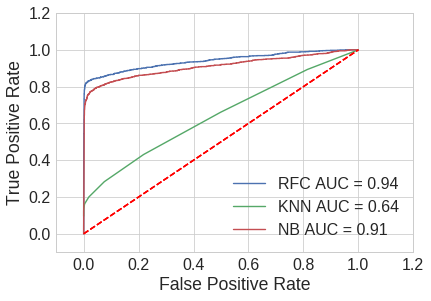

In [27]:
model_names =['RFC','KNN','NB']
roc_plot([y_pred_prob_rfc,y_pred_prob_knn,y_pred_prob_gnb],False,model_names)
sns.plt.grid(True)
sns.plt.savefig("Results/VV/VV-ROC.png",dpi=600)
sns.plt.show()

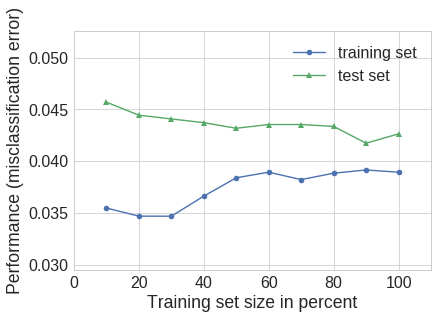

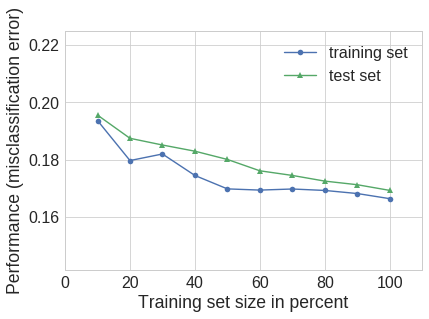

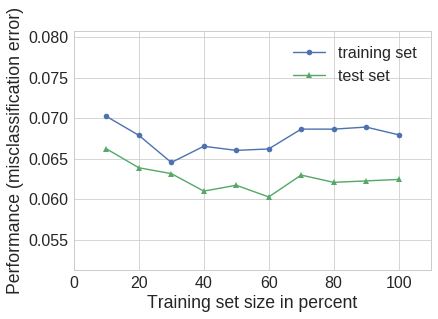

In [28]:
sns.plt.figure()
plot_learning_curves(x_train0.values, y_train0.values, x_test0.values, y_test0.values, rfc
                     ,print_model=False,style="seaborn-whitegrid")
sns.plt.savefig("Results/VV/VV-RFC_learning_curve.png",dpi=600)
sns.plt.figure()
plot_learning_curves(x_train0.values, y_train0.values, x_test0.values, y_test0.values, knn
                     ,print_model=False,style="seaborn-whitegrid")
sns.plt.savefig("Results/VV/VV-KNN_learning_curve.png",dpi=600)
sns.plt.figure()
plot_learning_curves(x_train0.values, y_train0.values, x_test0.values, y_test0.values, gnb
                     ,print_model=False,style="seaborn-whitegrid")
sns.plt.savefig("Results/VV/VV-NB_learning_curve.png",dpi=600)

sns.plt.show()

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=sns.plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    sns.plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #sns.plt.title(title)
    #sns.plt.colorbar()
    tick_marks = np.arange(len(classes))
    sns.plt.xticks(tick_marks, classes, rotation=45)
    sns.plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        sns.plt.text(j, i, round(cm[i, j],2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    sns.plt.tight_layout()
    sns.plt.grid(False)
    sns.plt.ylabel('True label')
    sns.plt.xlabel('Predicted label')
    
def evaluate(model,modelname):
    f = open("Results/VV/VV-Classification_report.txt","w")
    for i in range(len(models)):
        # Do the actual prediction
        
        
        print('====================================================')
        print('Classification Report for %s'%modelname[i])
        print('====================================================')
        print(classification_report(y_test0,model[i],target_names=['Not RFI','RFI']))

        print('\n The model is %f accurate' %(accuracy_score(y_test0,model[i])*100))
        f.write('==================================================== \n')
        f.write('Classification Report for %s \n'%modelname[i])
        f.write('==================================================== \n')
        f.write(classification_report(y_test0,model[i],target_names=['Not RFI','RFI']))

        f.write('\n The model is %f accurate \n' %(accuracy_score(y_test0,model[i])*100))
        print('Confusion Matrix')
        cnf_matrix = confusion_matrix(y_test0,model[i])
        sns.plt.figure()
        #sns.plt.subplot(1,3,i+1)
        plot_confusion_matrix(cnf_matrix, classes=target_names)
                      #title='Confusion matrix')
        sns.plt.savefig("Results/VV/HH-"+str(modelname[i])+"_confusion_matrix.png",dpi=600)
        #sns.plt.subplot(2,1,2)
        #plot_confusion_matrix(cnf_matrix, classes=target_names,normalize=True
        #                      ,title='Normalized confusion matrix')
        print('====================================================\n\n')
    f.close()

Classification Report for KNN
             precision    recall  f1-score   support

    Not RFI       0.83      1.00      0.90      4453
        RFI       0.92      0.16      0.28      1105

avg / total       0.85      0.83      0.78      5558


 The model is 83.069449 accurate
Confusion Matrix


Classification Report for RFC
             precision    recall  f1-score   support

    Not RFI       0.95      0.99      0.97      4453
        RFI       0.97      0.81      0.88      1105

avg / total       0.96      0.96      0.96      5558


 The model is 95.735876 accurate
Confusion Matrix


Classification Report for NB
             precision    recall  f1-score   support

    Not RFI       0.94      0.98      0.96      4453
        RFI       0.91      0.76      0.83      1105

avg / total       0.94      0.94      0.94      5558


 The model is 93.756747 accurate
Confusion Matrix




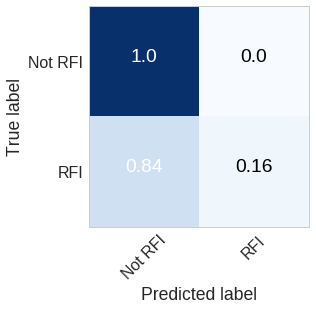

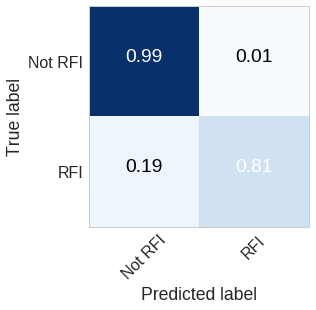

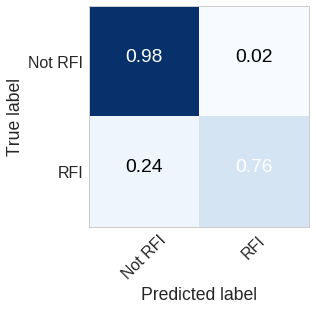

In [30]:
models =[y_pred_knn, y_pred_rfc,y_pred_gnb]
model_names =['KNN','RFC','NB']
#sns.plt.figure(figsize=(20,20))
evaluate(models,model_names)
sns.plt.show()

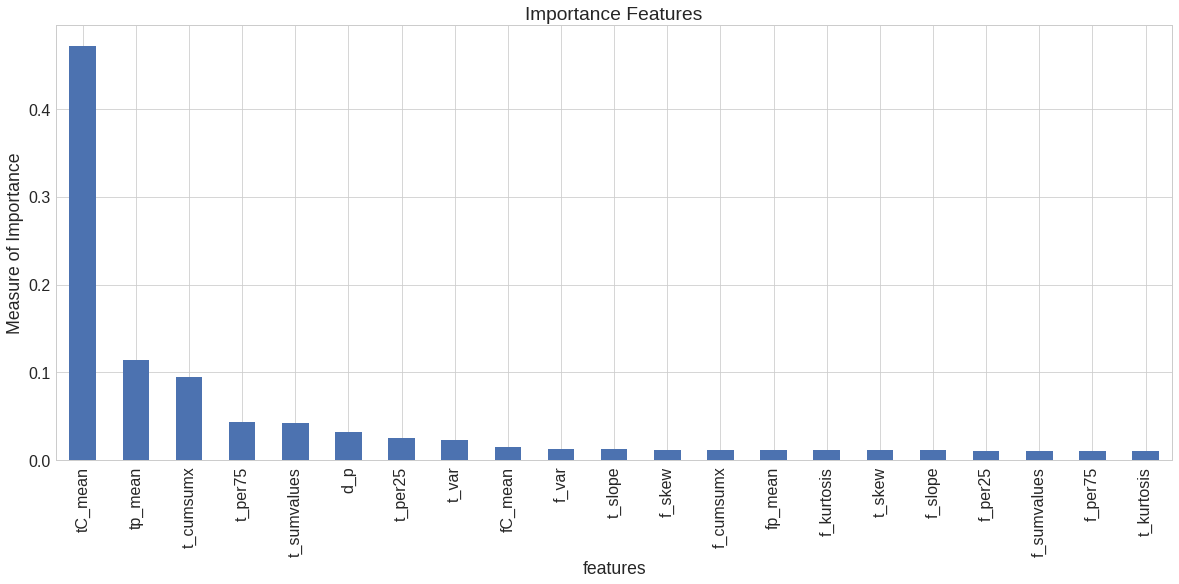

In [31]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

feature_space= []
# Print the feature ranking
o = open("Results/VV/VV-feature_rank.txt","w")
o.write("Feature ranking: \n")
impdf = []
for f in range(x_train0.shape[1]):
    o.write("%d. feature %s (%f) \n" % (f + 1, names[indices[f]], importances[indices[f]]))
    feature_space.append(names[indices[f]])
    impdf.append({'features': names[indices[f]], 'importance': importances[indices[f]]})
o.close()
impdf = pd.DataFrame(impdf)
impdf = impdf.sort_values(by='importance', ascending=False).reset_index(drop=True)
impdf['importance'] /= impdf['importance'].sum()
impdf.index = impdf['features']
sns.plt.figure()
impdf.plot(kind='bar', title='Importance Features', figsize=(20, 8),legend=False,fontsize=16.0)
sns.plt.ylabel("Measure of Importance")
sns.plt.grid(True)
sns.plt.savefig("Results/VV/HH-feature_rank.png",dpi=600)
sns.plt.show()

/data/olorato/mywork/local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


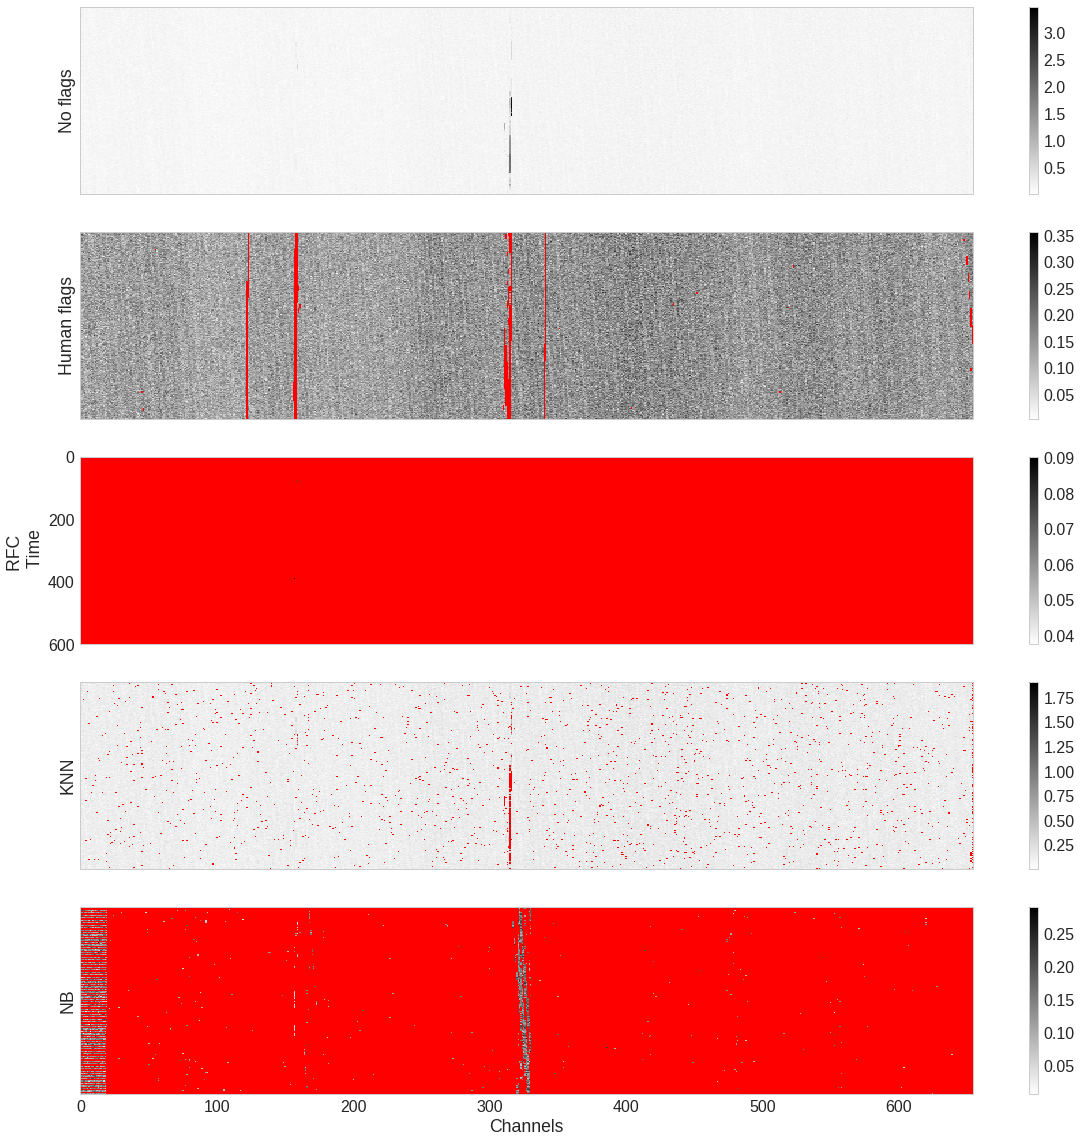

In [32]:
testVV = pd.DataFrame.from_csv('HH1333134985_pks1613-586.1822.ms_all_data_baseline4and5.csv')
testVV = testVV.replace(to_replace=np.nan,value=0.0)
rfi_rfc =rfc.predict(testVV[names])
rfi_knn = knn.predict(testVV[names])
rfi_gnb = gnb.predict(testVV[names])

image = np.reshape(testVV['d_p'],(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))
org_flags = np.reshape(testVV['rfi'],(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))
rfc_flags = np.reshape(rfi_rfc,(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))
knn_flags = np.reshape(rfi_knn,(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))
gnb_flags = np.reshape(rfi_gnb,(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))


sns.plt.figure(figsize=(20,20))
sns.plt.subplot(5,1,1)
sns.plt.imshow(image.T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("No flags")
sns.plt.xticks([])
sns.plt.yticks([])

sns.plt.subplot(5,1,2)
sns.plt.imshow(np.ma.array(image,mask=org_flags).T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("Human flags")
sns.plt.xticks([])
sns.plt.yticks([])


sns.plt.subplot(5,1,3)
sns.plt.imshow(np.ma.array(image,mask=rfc_flags).T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("Time")
#sns.plt.xlabel("Channels")
sns.plt.ylabel("RFC \n Time")
sns.plt.xticks([])


sns.plt.subplot(5,1,4)
sns.plt.imshow(np.ma.array(image,mask=knn_flags).T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("KNN")
sns.plt.xticks([])
sns.plt.yticks([])

sns.plt.subplot(5,1,5)
sns.plt.imshow(np.ma.array(image,mask=gnb_flags).T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
sns.plt.xlabel("Channels")
sns.plt.ylabel("NB")
sns.plt.yticks([])
sns.plt.savefig("Results/VV/seen_HH-model_flags2.png",dpi=600)
sns.plt.show()

In [33]:
f = open("Results/VV/seen_HH-model_flags2.txt","w")
f.write(" Data mean: {0} max: {1} std: {2} median: {3} \n".format(np.ma.mean(np.ma.array(image[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:]))))

f.write(" Human mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.sum(org_flags,dtype=float)/len(np.ravel(org_flags))))

f.write(" RFC mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.sum(rfc_flags,dtype=float)/len(np.ravel(rfc_flags))))

f.write(" KNN mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.sum(knn_flags,dtype=float)/len(np.ravel(knn_flags))))

f.write(" NB mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.sum(gnb_flags,dtype=float)/len(np.ravel(gnb_flags))))
f.close()

In [34]:
np.sum(knn_flags == 1,dtype=float)/len(np.ravel(knn_flags))

0.014926208651399491

In [35]:
time = 0

In [36]:
time = time + 40
sns.plt.figure()
sns.plt.subplot("311")
sns.plt.plot((image[:,time]))
#sns.plt.xlabel("Channels")
#sns.plt.ylabel("Amplitude")
sns.plt.xticks([])
sns.plt.ylim(0.0,0.35)
#sns.plt.plot(np.log10(np.mean(image[:,:],axis=1)))
sns.plt.subplot("312")
sns.plt.plot((np.ma.array(image[:,time],mask=rfc_flags[:,time])))
#sns.plt.xlabel("Channels")
sns.plt.ylabel("Amplitude")
sns.plt.xticks([])
sns.plt.ylim(0.0,0.35)

sns.plt.subplot("313")
sns.plt.plot((np.ma.array(image[:,time],mask=rfc_flags[:,time]) - image[:,time]))
sns.plt.xlabel("Channels")
#sns.plt.ylabel("Amplitude")
sns.plt.ylim(0.0,0.35)

for i in range(len(image[:,time])):
    if rfc_flags[i,time] == 1:
        sns.plt.axvline(i,alpha=0.1,color='r')

sns.plt.figure()
sns.plt.subplot("311")
sns.plt.plot((image[:,time]))
sns.plt.xlabel("Channels")
sns.plt.ylabel("Amplitude")
sns.plt.xticks([])
#sns.plt.plot(np.log10(np.mean(image[:,:],axis=1)))
sns.plt.subplot("312")
sns.plt.plot((np.ma.array(image[:,time],mask=knn_flags[:,time])))
sns.plt.xlabel("Channels")
sns.plt.ylabel("Amplitude")
sns.plt.xticks([])

sns.plt.subplot("313")
sns.plt.plot((np.ma.array(image[:,time],mask=knn_flags[:,time]) - image[:,time]))
sns.plt.xlabel("Channels")
sns.plt.ylabel("Amplitude")

for i in range(len(image[:,time])):
    if knn_flags[i,time] == 1:
        sns.plt.axvline(i,alpha=0.1,color='r')

sns.plt.figure()
sns.plt.subplot("311")
sns.plt.plot((image[:,time]))
#sns.plt.xlabel("Channels")
sns.plt.ylabel("Amplitude")
sns.plt.xticks([])
#sns.plt.plot(np.log10(np.mean(image[:,:],axis=1)))
sns.plt.subplot("312")
sns.plt.plot((np.ma.array(image[:,time],mask=gnb_flags[:,time])))
#sns.plt.xlabel("Channels")
sns.plt.ylabel("Amplitude")
sns.plt.xticks([])

sns.plt.subplot("313")
sns.plt.plot((image[:,time]-np.ma.array(image[:,time],mask=gnb_flags[:,time])))
sns.plt.xlabel("Channels")
sns.plt.ylabel("Amplitude")

for i in range(len(image[:,time])):
    if gnb_flags[:,time] == 1:
        sns.plt.axvline(i,alpha=0.1,color='r')



sns.plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
testVV = pd.DataFrame.from_csv('VV1333305511_pks1613-586.1822.ms_all_data_baseline0and1.csv')
rfi_rfc =rfc.predict(testVV[names])
rfi_knn = knn.predict(testVV[names])
rfi_gnb = gnb.predict(testVV[names])

image = np.reshape(testVV['d_p'],(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))
org_flags = np.reshape(testVV['rfi'],(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))
rfc_flags = np.reshape(rfi_rfc,(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))
knn_flags = np.reshape(rfi_knn,(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))
gnb_flags = np.reshape(rfi_gnb,(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))


sns.plt.figure(figsize=(20,20))
sns.plt.subplot(5,1,1)
sns.plt.imshow(image.T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("No flags")
sns.plt.xticks([])
sns.plt.yticks([])

sns.plt.subplot(5,1,2)
sns.plt.imshow(np.ma.array(image,mask=org_flags).T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("Human flags")
sns.plt.xticks([])
sns.plt.yticks([])


sns.plt.subplot(5,1,3)
sns.plt.imshow(np.ma.array(image,mask=rfc_flags).T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("Time")
#sns.plt.xlabel("Channels")
sns.plt.ylabel("RFC \n Time")
sns.plt.xticks([])


sns.plt.subplot(5,1,4)
sns.plt.imshow(np.ma.array(image,mask=knn_flags).T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("KNN")
sns.plt.xticks([])
sns.plt.yticks([])

sns.plt.subplot(5,1,5)
sns.plt.imshow(np.ma.array(image,mask=gnb_flags).T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
sns.plt.xlabel("Channels")
sns.plt.ylabel("NB")
sns.plt.yticks([])
sns.plt.savefig("Results/VV/seen_VV-model_flags2.png",dpi=600)
sns.plt.show()

In [ ]:
f = open("Results/VV/seen_VV-model_flags2.txt","w")
f.write(" Data mean: {0} max: {1} std: {2} median: {3} \n".format(np.ma.mean(np.ma.array(image[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:]))))

f.write(" Human mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.sum(org_flags,dtype=float)/len(np.ravel(org_flags))))

f.write(" RFC mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.sum(rfc_flags,dtype=float)/len(np.ravel(rfc_flags))))

f.write(" KNN mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.sum(knn_flags,dtype=float)/len(np.ravel(knn_flags))))

f.write(" NB mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.sum(gnb_flags,dtype=float)/len(np.ravel(gnb_flags))))

In [ ]:
testVV = pd.DataFrame.from_csv('HV1333305511_pks1613-586.1822.ms_all_data_baseline0and1.csv')
rfi_rfc =rfc.predict(testVV[names])
rfi_knn = knn.predict(testVV[names])
rfi_gnb = gnb.predict(testVV[names])

image = np.reshape(testVV['d_p'],(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))
org_flags = np.reshape(testVV['rfi'],(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))
rfc_flags = np.reshape(rfi_rfc,(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))
knn_flags = np.reshape(rfi_knn,(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))
gnb_flags = np.reshape(rfi_gnb,(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))


sns.plt.figure(figsize=(20,20))
sns.plt.subplot(5,1,1)
sns.plt.imshow(image.T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("No flags")
sns.plt.xticks([])
sns.plt.yticks([])

sns.plt.subplot(5,1,2)
sns.plt.imshow(np.ma.array(image,mask=org_flags).T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("Human flags")
sns.plt.xticks([])
sns.plt.yticks([])


sns.plt.subplot(5,1,3)
sns.plt.imshow(np.ma.array(image,mask=rfc_flags).T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("Time")
#sns.plt.xlabel("Channels")
sns.plt.ylabel("RFC \n Time")
sns.plt.xticks([])


sns.plt.subplot(5,1,4)
sns.plt.imshow(np.ma.array(image,mask=knn_flags).T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("KNN")
sns.plt.xticks([])
sns.plt.yticks([])

sns.plt.subplot(5,1,5)
sns.plt.imshow(np.ma.array(image,mask=gnb_flags).T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
sns.plt.xlabel("Channels")
sns.plt.ylabel("NB")
sns.plt.yticks([])
sns.plt.savefig("Results/VV/seen_HV-model_flags2.png",dpi=600)
sns.plt.show()

In [ ]:
f = open("Results/VV/seen_HV-model_flags2.txt","w")
f.write(" Data mean: {0} max: {1} std: {2} median: {3} \n".format(np.ma.mean(np.ma.array(image[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:]))))

f.write(" Human mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.sum(org_flags,dtype=float)/len(np.ravel(org_flags))))

f.write(" RFC mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.sum(rfc_flags,dtype=float)/len(np.ravel(rfc_flags))))

f.write(" KNN mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.sum(knn_flags,dtype=float)/len(np.ravel(knn_flags))))

f.write(" NB mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.sum(gnb_flags,dtype=float)/len(np.ravel(gnb_flags))))